# Severe Injury in Construction Analysis

Dataset from OSHA (https://www.osha.gov/severeinjury)

Problem:

Construction is a labor-intensive industry. Because of its complex activities, working in the construction industry is a high-risk job.

1. Construction is an industry with the second-highest number of work-related injury with 10% hospitalization and 19% amputation
2. Construction has the highest number of fatality cases
3. 5 of 10 most frequently violated OSHA standards in fiscal year 2021 is from construction industry
4. Most work-related injuries are preventable
5. $7.87 Billion: the cost of workers’ compensation direct costs from the top five injury causes in construction in 2020
6. 40% construction injuries result in days away from work (DAFW)

Objective:

1. Define the most common hazard and the most common event and source of the hazard
2. Giving recommendations for company to take proactive measures to prevent the hazard/event so the company can lower DAFW and costs

# Install and Import Libraries

In [1]:
!pip install SQLAlchemy==1.4.46

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Import Dataset

In [3]:
df = pd.read_csv('severe_injury.csv', encoding='cp1252')
df.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


# Preliminary Look

## Sample of Data

In [4]:
# sample 5 rows of the data
# using transporse to make it easier to read
df.sample(5).T

,74145,16302,63543,62113,52859
ID,2022064855,2016087845,2021032524,2021010782,2020010288
UPA,1904504,1127328,1750067,1727196,1533211
EventDate,6/6/2022,8/21/2016,3/25/2021,1/28/2021,1/10/2020
Employer,"National Material Processing, LLC",U.S. POSTAL SERVICE,"Manitowoc Tool & Machining, LLC","Carvana, LLC",DEWITT COMPANY
Address1,12100 S. Stoney Island,2310 Manard Jackson Parkway,4211 Clipper Drive,2150 NW 117th Place,905 SOUTH KINGSHIGHWAY
Address2,NaN,NaN,NaN,NaN,NaN
City,CHICAGO,ATLANTA,MANITOWOC,MIAMI,SIKESTON
State,IL,GEORGIA,WI,FL,MISSOURI
Zip,60633.0,30320.0,54220.0,33182.0,63801.0
Latitude,41.67,33.63,44.08,25.79,36.88


Observations:

1. There are 14 numerical variables: `ID`, `UPA`, `Zip`, `Latitude`, `Longitude`, `Primary NAICS`, `Hospitalized`, `Amputation`, `Inspection`, `Nature`, `Part of Body`, `Event`, `Source`, and `Secondary Source`
2. `Hospitalized` and `Amputation` seem have two distinct values/binary (0,1) -> we will check it later
3. No obvious defect on the data (column name vs its entries)
4. `Primary NAICS` represents industry type, based on the NAICS code
5. `Nature`, `Part of Body`, `Event`, `Source`, and `Secondary Source` represent the type of each, which the 'title' is clarified in the next column
6. `State` does not have a similar format, some are written in full and some written into 2-letters

## General Information and Missing Values

In [5]:
df.shape

(74880, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74880 entries, 0 to 74879
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      74880 non-null  int64  
 1   UPA                     74880 non-null  int64  
 2   EventDate               74880 non-null  object 
 3   Employer                74880 non-null  object 
 4   Address1                74863 non-null  object 
 5   Address2                6819 non-null   object 
 6   City                    74864 non-null  object 
 7   State                   74880 non-null  object 
 8   Zip                     74857 non-null  float64
 9   Latitude                74823 non-null  float64
 10  Longitude               74823 non-null  float64
 11  Primary NAICS           74878 non-null  object 
 12  Hospitalized            74880 non-null  float64
 13  Amputation              74874 non-null  float64
 14  Inspection              25107 non-null

In [7]:
df.isnull().sum()

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     17
Address2                  68061
City                         16
State                         0
Zip                          23
Latitude                     57
Longitude                    57
Primary NAICS                 2
Hospitalized                  0
Amputation                    6
Inspection                49773
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          47957
Secondary Source Title    47957
dtype: int64

Observations:

1. The data contains 26 columns and 74880 rows
2. No obvious defect on the data (column name vs its entries and datatypes), except for dates, we will convert it to datetime later
3. There are some missing values, but we will decide later what to do with the missing values

# Data Cleaning and Pre-processing

## Filtering the Data

1. We only wanted to see the data coming from construction industry. The NAICS code of construction industry begins with 23, thus we will filter the data that has NAICS code begin with 23
2. We will only use `ID`, `EventDate`, `Primary NAICS`, `Hospitalized`, `Amputation`, `EventTitle`, and `SourceTitle`for analysis

In [8]:
# rename some columns name so all have similar format (only the used ones)
df = df.rename(columns={'Primary NAICS':'NAICS', 
                        'Final Narrative':'FinalNarrative'})

In [9]:
q = """
select 
  ID,
  EventDate,
  NAICS,
  Hospitalized,
  Amputation,
  EventTitle,
  SourceTitle
from df 
where NAICS like '23%'
"""

df_cons = sqldf(q)
df_cons.head()

,ID,EventDate,NAICS,Hospitalized,Amputation,EventTitle,SourceTitle
0,2015010029,1/2/2015,238110,1.0,0.0,Struck by object or equipment dropped by other...,"Structural elements, n.e.c."
1,2015010037,1/2/2015,237990,1.0,0.0,Stepped on object,"Nails, brads, tacks, nuts, bolts, washers"
2,2015010043,1/3/2015,238990,1.0,0.0,Struck by object falling from vehicle or machi...,"Bars, rods, reinforcing bar (rebar)"
3,2015010068,1/5/2015,237120,1.0,0.0,Other jump to lower level less than 6 feet,Trailers
4,2015010073,1/5/2015,238290,1.0,0.0,Other fall to lower level 11 to 15 feet,"Ladders, unspecified"


## General Information and Missing Values (Part 2, Filtered One)

In [10]:
df_cons.shape

(13376, 7)

In [11]:
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13376 entries, 0 to 13375
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            13376 non-null  int64  
 1   EventDate     13376 non-null  object 
 2   NAICS         13376 non-null  object 
 3   Hospitalized  13376 non-null  float64
 4   Amputation    13374 non-null  float64
 5   EventTitle    13376 non-null  object 
 6   SourceTitle   13376 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 731.6+ KB


In [12]:
# check missing value
df_cons.isnull().sum()

ID              0
EventDate       0
NAICS           0
Hospitalized    0
Amputation      2
EventTitle      0
SourceTitle     0
dtype: int64

There are 2 missing values in the filtered data

In [13]:
# drop missing value
df_cons.dropna(inplace=True)

## Duplicated Data

In [14]:
# check duplicated data
df_cons.duplicated().sum()

0

No duplicated data :)

## Unique Values

In [15]:
# check unique value
df_cons.nunique()

ID              13374
EventDate        2415
NAICS              45
Hospitalized        5
Amputation          3
EventTitle        257
SourceTitle       614
dtype: int64

Observations:

1. `ID` are unique to each rows
2. `Hospitalized` and `Amputation` are not binary

## Change `EventDate` to datetime

In [16]:
df_cons['EventDate'] = pd.to_datetime(df_cons['EventDate'])

## Check `Hospitalized`

In [17]:
# check unique value of 'Hospitalized'
df_cons['Hospitalized'].unique()

array([1., 0., 2., 3., 4.])

In [18]:
# check the differences between each values
with pd.option_context('display.max_colwidth', None):
     display(df[['Hospitalized','FinalNarrative']][df['Hospitalized']==0].sample(3))
     display(df[['Hospitalized','FinalNarrative']][df['Hospitalized']==1].sample(3))
     display(df[['Hospitalized','FinalNarrative']][df['Hospitalized']==4].sample())

,Hospitalized,FinalNarrative
3300,0.0,"An employee was drilling on an electrical panel using a cordless Dewalt 20 volt drill when her glove got caught. Her hand placement was directly behind the 8"" drill bit. The grove somehow wrapped into the bit and pulled it through."
50583,0.0,An employee was loading ham into a machine. His left index fingertip was amputated by the machine's product metal detector.
45343,0.0,An employee was cutting conduit with a battery-operated band saw. The band saw jammed and kicked back amputating the employee's left index finger to the nail bed.


,Hospitalized,FinalNarrative
46910,1.0,"An employee was working outside most of the day landscaping, tilling, and laying out straw roll. He was driving a tractor tilling the ground when he started to feel exhausted, was excessively sweating, and felt like he was overheating. He went inside to drink some water. He felt nauseous and threw up. He was hospitalized with heat exhaustion, an acute kidney injury, and dehydration."
5313,1.0,An employee fell from a ladder while inspecting the roof.
9762,1.0,"An employee was walking down a wet grassy incline towards the parking lot, slipped, and fell fracturing the left ankle."


,Hospitalized,FinalNarrative
49250,4.0,"Four employee were pouring a 320"" copper stock. A hose failed which caused the ram of the casting unit to drop during the pouring process. The falling of this ram, which was controlled by the caster, allowed molten copper to come in contact with steam inside the pit that is filled with water. This caused a violent reaction/explosion. All four employees received burns to their arms, body, and face when they were sprayed with molten copper."


From the data shown above, it is clear that `Hospitalized` define the number of how many employees are hospitalized because of the incident

## Check `Amputation`

In [19]:
# check unique value of 'Amputation'
df_cons['Amputation'].unique()

array([0., 1., 2.])

In [20]:
# check the differences between each values
with pd.option_context('display.max_colwidth', None):
     display(df[['Amputation','FinalNarrative']][df['Amputation']==0].sample(3))
     display(df[['Amputation','FinalNarrative']][df['Amputation']==1].sample(3))
     display(df[['Amputation','FinalNarrative']][df['Amputation']==2].sample(3))

,Amputation,FinalNarrative
68050,0.0,"An employee was walking from her car to a building entrance. She tripped on a pallet and fell, suffering a fractured and dislocated shoulder."
523,0.0,"Employee was loading a commercial chain link fence approximately 45' X 6', 400 to 500 pounds, onto a flatbed of a Dodge 350 truck. The employee fell from the edge of the flatbed to the ground on his lower back and hit his head. The employee hurt his back and fractured his skull but remained conscious."
17577,0.0,"While unpacking boxes of newly received fabric, an employee tripped and fell on a packaging strap, fracturing the left hip and requiring surgery."


,Amputation,FinalNarrative
43006,1.0,"An employee was changing a cylinder on a printing press. The employee's left index finger was caught in the hoist used to change the cylinder, causing an amputation to the fingertip."
16290,1.0,"An employee was using a knife to cut chicken when the knife cut his finger, resulting in the amputation of his left index fingertip (no bone loss)."
51278,1.0,"An employee was replacing the rubber gasket on a dredge boat's discharge pipe. The dredge boat was moving with the waves, which pushed the dredge pipe into the pontoon of the boat. The employee was holding the end of the dredge pipe when it struck the pontoon of the boat. The employee's right index finger was caught between the end of the pipe and the pontoon, resulting in a fingertip amputation."


,Amputation,FinalNarrative
822,2.0,A worker operating a skid-steer loader amputated the first finger on the right hand and the fourth finger on the left hand when they were crushed between the skid-steer and a dumpster.
36781,2.0,"On 7/26/2018, an employee's finger was caught in an auger, resulting in a right middle finger amputation at the first digit. On 7/28/2018, an employee's fingers were caught in a belt and pulley powered by an electric motor, resulting in an amputation of the left index and middle fingers at the second knuckle. This record contains two separate events that were reported simultaneously to OSHA by the employer. These events are captured as one report."
5658,2.0,Two employees operating a meat slicer inside the kitchen area lacerated their fingertips requiring amputation.


1. `Amputation` = 0 clearly shows that no one amputated
2. `Amputation` = 1 and `Amputation` = 2 seem to have no differences, they specify the number of body parts or employees amputated and how the incident happened but we cannot see any noticeable differences between them.

We will replace `Amputation`; 0 to 'No', 1 and 2 to 'Yes'

In [21]:
# replace 1 and 2 to yes and 0 to no
df_cons['Amputation'] = df_cons['Amputation'].replace([0, 1, 2], ['No','Yes','Yes'])
df_cons['Amputation'].unique()

array(['No', 'Yes'], dtype=object)

## Mapping `EventTitle` to General Event/Hazard Type

In [22]:
# Falls, Slips, Trips

fst = df_cons['EventTitle'][(~df_cons['EventTitle'].str.contains('struck|swing',case=False)) &
                            (df_cons['EventTitle'].str.contains('fall|slip|trip',case=False))].drop_duplicates().to_list()
    
#fst = df_cons[['EventTitle','ID']][(~df_cons['EventTitle'].str.contains('struck|swing',case=False)) &
                            #(df_cons['EventTitle'].str.contains('fall|slip|trip',case=False))].groupby('EventTitle')['ID'].count().sort_values(ascending=False).reset_index()
fst

['Other fall to lower level 11 to 15 feet ',
 'Fall on same level due to slipping ',
 'Other fall to lower level less than 6 feet',
 'Other fall to lower level 6 to 10 feet',
 'Fall to lower level, unspecified',
 'Fall, slip, trip, unspecified ',
 'Fall on same level, n.e.c. ',
 'Other fall to lower level, unspecified',
 'Fall through surface or existing opening 16 to 20 feet',
 'Fall through surface or existing opening 21 to 25 feet ',
 'Fall through surface or existing opening 11 to 15 feet ',
 'Fall through surface or existing opening 6 to 10 feet',
 'Other fall to lower level 21 to 25 feet ',
 'Other fall to lower level 16 to 20 feet',
 'Other fall to lower level 26 to 30 feet',
 'Fall on same level due to tripping on uneven surface',
 'Fall from collapsing structure or equipment 6 to 10 feet',
 'Fall through surface or existing opening, unspecified',
 'Slip without fall, unspecified',
 'Fall from collapsing structure or equipment 16 to 20 feet',
 'Fall from collapsing structure or

In [23]:
# Struck by / struck against

struck = df_cons['EventTitle'][(df_cons['EventTitle'].str.contains('struck',case=False))].drop_duplicates().to_list()

struck

['Struck by object or equipment dropped by other person',
 'Struck by object falling from vehicle or machinery-other than vehicle part',
 'Struck by falling object or equipment, n.e.c.',
 'Struck by discharged object or substance',
 'Struck against moving part of machinery or equipment',
 'Struck by rolling object or equipment-other than powered vehicle, unspecified',
 'Pedestrian struck by vehicle in nonroadway area, unspecified',
 'Struck by powered vehicle-nontransport, unspecified',
 'Struck against stationary object or equipment, n.e.c.',
 'Struck by object or equipment, unspecified',
 'Struck by dislodged flying object, particle',
 'Struck by discharged or flying object, n.e.c.',
 'Struck by swinging or slipping object, other than handheld, n.e.c.',
 'Struck by falling part of powered vehicle still attached',
 'Struck by falling object or equipment, unspecified',
 'Pedestrian struck by vehicle backing up in nonroadway area',
 'Struck, caught, or crushed in other collapsing struct

In [24]:
# Caught in / caught between / compressed

caught = df_cons['EventTitle'][(~df_cons['EventTitle'].str.contains('struck',case=False)) &
                               (df_cons['EventTitle'].str.contains('compressed|caught',case=False))].drop_duplicates().to_list()

caught

['Compressed or pinched by shifting objects or equipment',
 'Caught in or compressed by equipment or objects, n.e.c.',
 'Caught in or compressed by equipment or objects, unspecified',
 'Compressed or pinched between two stationary objects',
 'Caught in running equipment or machinery during regular operation',
 'Caught in running equipment or machinery during maintenance, cleaning ',
 'Part of occupant’s body caught between vehicle and other object in nonroadway transport incident',
 'Caught between rolling powered vehicle and other object',
 'Caught in running equipment or machinery, unspecified',
 'Caught in running equipment or machinery, n.e.c.',
 'Caught in running equipment or machinery during maintenance, cleaning']

In [25]:
# Electrocution

electro = df_cons['EventTitle'][(df_cons['EventTitle'].str.contains('electricity',case=False))].drop_duplicates().to_list()

electro

['Direct exposure to electricity, greater than 220 volts',
 'Direct exposure to electricity, unspecified',
 'Indirect exposure to electricity, greater than 220 volts',
 'Exposure to electricity, unspecified',
 'Direct exposure to electricity, 220 volts or less',
 'Indirect exposure to electricity, unspecified',
 'Indirect exposure to electricity, 220 volts or less']

In [26]:
# mapping 'EventTitle' to a new column 'HazardType'
def map(row):
    if row['EventTitle'] in fst:
        val = 'Falls, Slips, Trips'
    elif row['EventTitle']  in struck:
        val = 'Struck By/Struck Against'
    elif row['EventTitle']  in caught:
        val = 'Caught In / Caught Between / Compressed'
    elif row['EventTitle']  in electro:
        val = 'Electrocution'
    else:
        val = 'Other'
    return val

df_cons['HazardType'] = df_cons.apply(map, axis=1)

In [27]:
# check sample
df_cons[['EventTitle','HazardType']].sample(5)

,EventTitle,HazardType
11560,"Direct exposure to electricity, unspecified",Electrocution
3256,Pedestrian struck by forward-moving vehicle in...,Struck By/Struck Against
446,"Struck by dislodged flying object, particle",Struck By/Struck Against
295,Other fall to lower level 11 to 15 feet,"Falls, Slips, Trips"
7682,Fall on same level due to tripping over an obj...,"Falls, Slips, Trips"


## Statistical Summary

In [28]:
# group column names based on type

categoricals = df_cons.select_dtypes(include=['object']).columns.tolist()

numericals = ['Hospitalized']

In [29]:
# numerical statistical summary
df_cons[numericals].describe()

,Hospitalized
count,13374.000000
mean,0.907283
std,0.333013
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [30]:
df_cons[categoricals].describe().T

,count,unique,top,freq
NAICS,13374,45,236220,1400
Amputation,13374,2,No,11328
EventTitle,13374,257,"Other fall to lower level, unspecified",1484
SourceTitle,13374,614,"Roofs, unspecified",580
HazardType,13374,5,"Falls, Slips, Trips",5399


Observations:

1. 1400 events are from industry with NAICS code 236220 (Commercial and Institutional Building Construction)
2. ~85% of events do not require the victim to be amputated, but ~37% of events make the victim fracture
3. The type of hazard that happens most often (5399) is Falls Slips Trips

In [31]:
# frequency details for each column
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df_cons[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column NAICS:
236220    1400
238210    1348
238160    1101
237310    1095
238220     988
238990     618
238120     599
238110     576
238910     572
237110     534
236210     505
237130     408
238310     393
237990     376
238130     372
238140     362
237120     361
236115     290
238320     263
238290     232
236116     158
236118     143
238350     135
238190     124
238390      99
238170      90
238150      86
238330      54
238340      27
236117      22
237210      16
23611        9
2371         4
23622        2
23           2
238          1
23829        1
23821        1
23899        1
23891        1
2362         1
23811        1
2361         1
23822        1
23713        1
Name: NAICS, dtype: int64
------------------------------


Value counts for column Amputation:
No     11328
Yes     2046
Name: Amputation, dtype: int64
------------------------------


Value counts for column EventTitle:
Other fall to lower level, unspecified                                   

# Exploratory Analysis

## Hazard Type

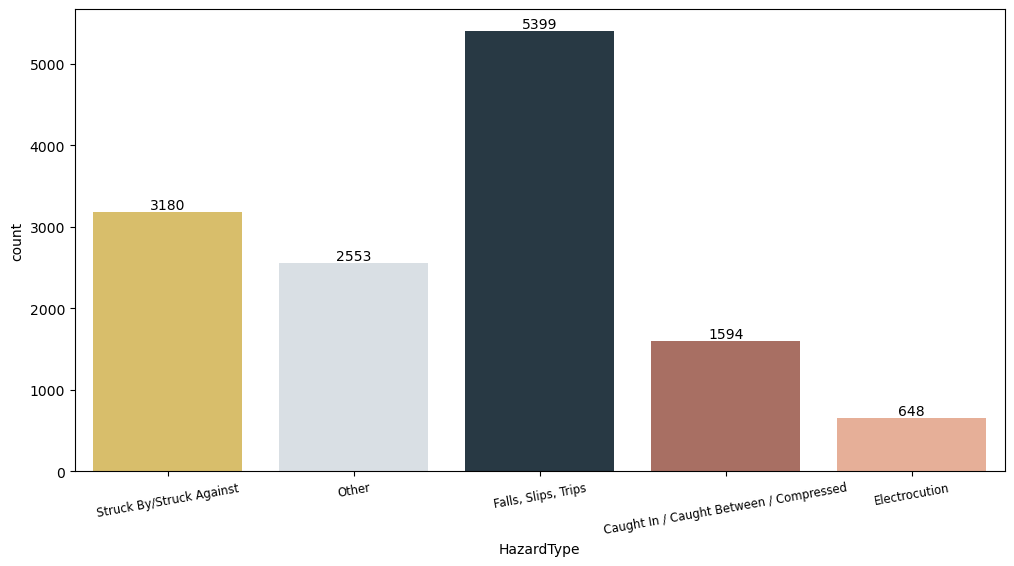

In [32]:
# frequency
plt.figure(figsize=(12, 6))

pal = ['#eac759', '#d7dfe6', '#233a49', '#b46857', '#f3aa8b']

fig = sns.countplot(x=df_cons['HazardType'], palette=pal)
plt.setp(fig.get_xticklabels(), rotation=10, fontsize='small')

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  
                 ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')
plt.show()

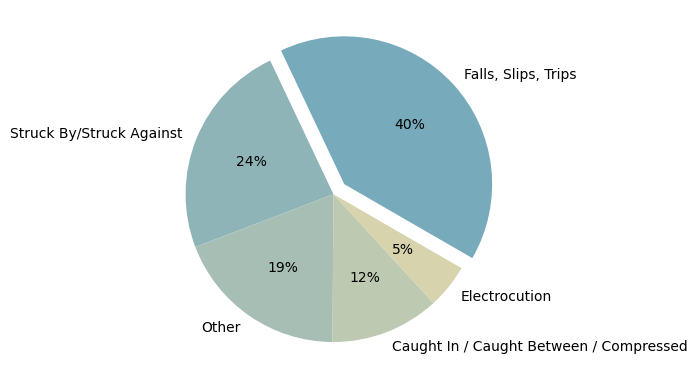

In [33]:
# propotion
prcnt_haz = df_cons['HazardType'].value_counts().sort_values(ascending=False) / df_cons['HazardType'].value_counts().sum() * 100
plt.pie(prcnt_haz, 
        labels=prcnt_haz.index,
        autopct='%1.0f%%',
        startangle=330,
        colors=sns.color_palette('blend:#7AB,#EDA'),
        explode=[0.1, 0, 0, 0, 0])
plt.show()

3 Major hazard type that caused severe injury in the construction industry are: 
1. Falls, Slips, Trips; 
2. Struck by/Struck against; 
3. Caught in-between/Compressed.

## `Amputation` and `Hospitalized`

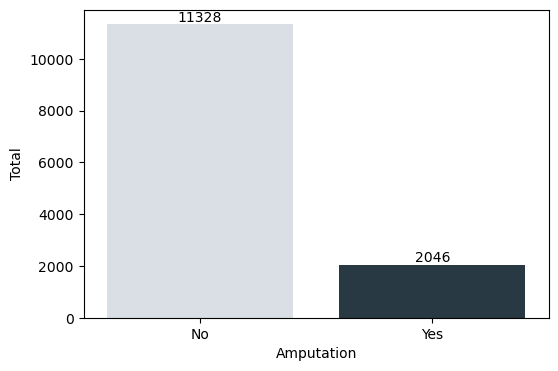

In [34]:
# count bar for 'Amputation'
fig, ax = plt.subplots(figsize=(6, 4))

color = ['#d7dfe6', '#233a49', '#b46857', '#3a5870']

sns.countplot(x=df_cons['Amputation'], palette=color)
ax.set(xlabel='Amputation', ylabel='Total')
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  
                 ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')

From 13374 events, most of the events (11790) had 1 person hospitalized and 2046 events had the worker(s) amputated

In [37]:
# crosstab `hospitalized`

hosp = pd.crosstab(df_cons['HazardType'],
                   df_cons['Hospitalized'])
hosp

Hospitalized,0.0,1.0,2.0,3.0,4.0
HazardType,,,,,
Caught In / Caught Between / Compressed,754,839,1,0,0
Electrocution,1,609,38,0,0
"Falls, Slips, Trips",28,5320,51,0,0
Other,270,2238,44,1,0
Struck By/Struck Against,361,2784,33,1,1


From 5399 cases of Fall Slips Trips, 5402 people were hospitalized. Struck by/against had 2 cases with more than 2 people injured.

In [35]:
# amputation per hazard type
# cases with amputation
amp = df_cons[df_cons['Amputation']=='Yes'].groupby('HazardType')['ID'].count().sort_index()

# cases without amputation
not_amp = df_cons[df_cons['Amputation']=='No'].groupby('HazardType')['ID'].count().sort_index()

print(amp)
print(not_amp)

HazardType
Caught In / Caught Between / Compressed    1042
Electrocution                                11
Falls, Slips, Trips                          36
Other                                       409
Struck By/Struck Against                    548
Name: ID, dtype: int64
HazardType
Caught In / Caught Between / Compressed     552
Electrocution                               637
Falls, Slips, Trips                        5363
Other                                      2144
Struck By/Struck Against                   2632
Name: ID, dtype: int64


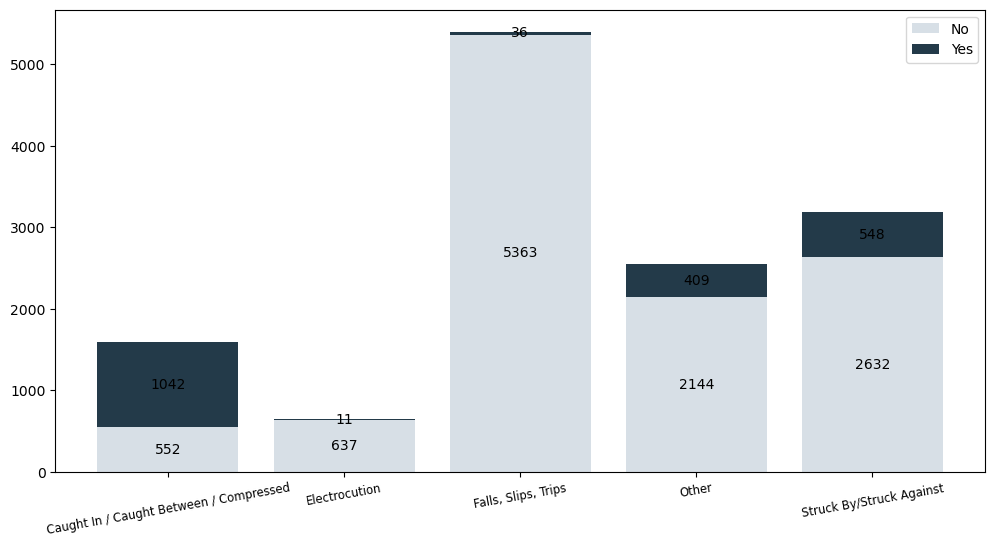

In [36]:
# make them into list
x = not_amp.index.to_list()
yes = amp.values.tolist()
no = not_amp.values.tolist()

# make stacked bars
fig, ax = plt.subplots(figsize=(12, 6))

ax1 = plt.bar(x, no, color='#d7dfe6')
ax2 = plt.bar(x, yes, bottom=no, color='#233a49')

ax.set_xticklabels(x, rotation=10, fontsize='small')

labels_legend = ['No', 'Yes']
ax.legend(labels=labels_legend)

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="black", fontsize=10,)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="black", fontsize=10,)
    
plt.show()

Caught in-between/compressed is the only hazard with the number of cases amputated more than 50% number of their cases. Conversely, falls slips trips had only 36 cases amputated from 5399 cases.

Observations conclusions:

From 2015 to mid 2022,
1. 'Falls Slips Trips' is the most common hazard in construction 
2. From severe injuries events in construction, 15.3% had the worker(s) amputated and 89% had a minimum of 1 worker hospitalized
3. Aside from its high numbers, falls slips trips in construction had only ~0.7% of cases the worker(s) is amputated. Caught in-between/compressed had 65% of cases the worker(s) is amputated

These numbers are why the cost of severe injuries and DAFW in construction is high.

# Falls, Slips, Trips

Based on the data, we know that falls slips trips is the most common hazard in the construction industry. Now let's check further about the details of falls slips trips hazard

## How is the trend of severe injuries caused by Falls, Slips, and Trips every year?

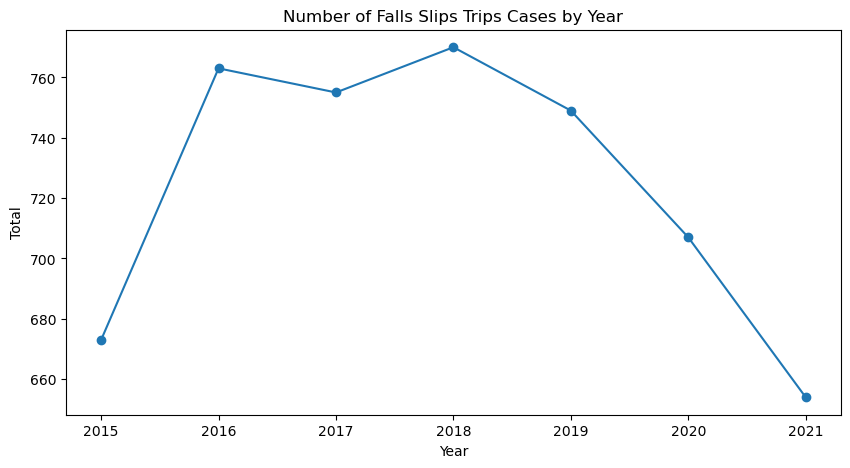

In [38]:
# make a new column 'Year'
df_cons['Year'] = df_cons['EventDate'].dt.to_period('Y')

# group the dates by year, excluding 2022 because the data is only until November 2022
fallsliptrip = df_cons[(df_cons['HazardType']=='Falls, Slips, Trips') & (df_cons['Year']<'2022')].groupby('Year')

# calculate the count of falls slips trips for each year
fst_counts = fallsliptrip.size()
fst_counts.index = fst_counts.index.astype(str)

# line chart
plt.figure(figsize=(10, 5))

plt.plot(fst_counts.index, fst_counts.values, marker='o')

plt.title('Number of Falls Slips Trips Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total')

plt.show()

In [39]:
# proportion of falls, slips, trips cases per year
all = df_cons[df_cons['Year']<'2022'].groupby('Year')
all_counts = all.size()
all_counts.index = all_counts.index.astype(str)

fst_prop = round((fst_counts / all_counts * 100),2)
print(fst_prop)

Year
2015    39.26
2016    40.85
2017    40.55
2018    39.11
2019    38.29
2020    40.91
2021    42.83
dtype: float64


The number of Fall Slip Trip cases looks decreasing by 2019. This is probably because the number of severe injury cases since 2018 has started to fall, which is good, but the rate of fall slip trip cases in construction has remained at ~40%.

## What event is the most likely to happen in falls slips trips accidents that cause severe injury?

In [40]:
# count events of falls slips trips grouped by 'EventTitle'
event = df_cons[df_cons['HazardType']=='Falls, Slips, Trips'].groupby('EventTitle')['HazardType'].count()

print(event.sort_values(ascending=False).head())

EventTitle
Other fall to lower level, unspecified        1484
Other fall to lower level 6 to 10 feet         695
Other fall to lower level less than 6 feet     555
Other fall to lower level 11 to 15 feet        514
Other fall to lower level 16 to 20 feet        294
Name: HazardType, dtype: int64


The top 5 events are 'fall to a lower level'. Now let's see how many fall to lower levels are there.

In [41]:
# count 'fall to lower level'
## 'fall through surface or existing opening' and 'fall from collapsing structure or equipment' is basically also 
## fall to lower level, so we will include them

lower = event[(event.index.str.contains('fall to lower level|fall through surface or existing opening|fall from collapsing structure or equipment',
                                        case=False))].sum()

print(f"Total 'fall to lower level' is {lower}. It is {round((lower/event.values.sum()*100),2)}% of all falls slips trips events")

Total 'fall to lower level' is 4700. It is 87.05% of all falls slips trips events


That is a really high number! How about fall on the same level?

In [42]:
all_event = event.values.sum()

# count 'fall on same level'
same = event[event.index.str.contains('fall on same level',case=False)].sum()

print(f"Total 'fall on same level' is {same}. It is {round((same/all_event*100),2)}% of all falls slips trips events")

Total 'fall on same level' is 466. It is 8.63% of all falls slips trips events


## Now that we know 'fall to lower level' is the highest number of falls slips trips event that causes severe injury. What are the sources of the events?

In [43]:
# sources of fall to lower level events
source = df_cons[(df_cons['HazardType']=='Falls, Slips, Trips') & 
                 (df_cons['EventTitle'].str.contains('fall to lower level|fall through surface or existing opening|fall from collapsing structure or equipment',
                                                    case=False))].groupby('SourceTitle')['HazardType'].count()

source.sort_values(ascending=False).head()

SourceTitle
Roofs, unspecified                560
Movable ladders, unspecified      469
Ladders, unspecified              417
Scaffolds-staging, unspecified    394
Step ladders                      318
Name: HazardType, dtype: int64

Looks like ladders are the most often. Let's see the proportion.

In [44]:
all_source = source.values.sum()

# count roof
roof = source[source.index.str.contains('roof',case=False)].sum()

# count scaffolding or staging
scaffold = source[source.index.str.contains('scaffold|staging',case=False)].sum()

# count ladders
ladders = source[source.index.str.contains('ladders',case=False)].sum()

# count existing openings
openings = source[source.index.str.contains('opening|skylight',case=False)].sum()

# count lifts
lifts = source[source.index.str.contains('lifts|elevator|hoist',case=False)].sum()

print(f"""{ladders} ({round((ladders/all_source*100),2)}%) 'fall to lower level' severe injuries are from ladders, 
{roof} ({round((roof/all_source*100),2)}%) from roofs, 
{scaffold} ({round((scaffold/all_source*100),2)}%) from scaffolding or staging,
{openings} ({round((openings/all_source*100),2)}%) from existing openings, and
{lifts} ({round((lifts/all_source*100),2)}%) from aerial lifts, elevators, and hoists""")

1558 (33.15%) 'fall to lower level' severe injuries are from ladders, 
809 (17.21%) from roofs, 
565 (12.02%) from scaffolding or staging,
329 (7.0%) from existing openings, and
200 (4.26%) from aerial lifts, elevators, and hoists


# Conclusions and Recommendations

## Conclusions

1. The most common hazard in construction is Falls, Slips, Trips hazard
2. The most common event related to falls, slips, trips is fall to lower level. We could say this is predictable because the activities and tasks in construction involve a lot of work at a height
3. 3 top sources of fall to lower level are: ladders (33%), roofs (17%), and scaffolding/staging (12%)
4. The high number of falls, slips, trips cases also contributes greatly to the high costs incurred to compensate workers for hospitalization and amputations. Hospitalization and amputation also cause DAFW, thereby reducing the productivity of construction activities and can cause delays in the target

## Recommendations

1. Plan the job - employers must plan projects to ensure that the job is done safely
2. Training - every worker should be trained on proper set-up and safe use of equipment they use on the job, especially about working at height and falls slips trips hazard
3. Improve supervision - employers have to make sure the job requiring ladders and any work in heights is well oversight by HSE Team
4. Equipments - every tool and equipment should be inspected, regularly and before use. The equipment like ladders, scaffolds, staging, etc should follow the applicable standard
5. PPE and fall protection - always make sure the RIGHT PPE is provided in adequate amount and condition. Also, fall protection must be provided by the employer and erected, maintained, and used with the correct procedure